# 1. Data Importing

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

In [2]:
# %load wrangling.py
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np
import gzip

# helper functions to read the data in loose json format into pandas DataFrame
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getMeta(path):
    i = 0
    meta = {}
    for d in parse(path):
        meta[i] = d
        i += 1
    return pd.DataFrame.from_dict(meta, orient='index')

def getDF(path, ind=0):
    # each time get 1/10 of DF
    chunksize = ((82456877 // 100)*10)+10 # 8245690 
    i = 0
    df = {}
    for d in parse(path):
        if (i >= ind*chunksize) and (i < (ind+1)*chunksize):
            df[i] = d
        i += 1
        if i == (ind+1)*chunksize:
            break
    return pd.DataFrame.from_dict(df, orient='index')

## to save large dataframe for later use - preventing waste of time loading json for every re-run
# to meta.h5
def meta_to_hdf(df, name='meta', number=10):
    chunksize = int(np.ceil(df.shape[0]/number))
    
    for i in range(number):
        df[chunksize*i:chunksize*(i+1)].to_hdf('./h5_data/'+name+'_'+str(i)+'.h5', key='df', mode='w')
        if i == number-1: # last chunk
            break
    df[chunksize*i:].to_hdf('./h5_data/'+name+'_'+str(i)+'.h5', key='df', mode='w')

# read meta.h5
def read_hdf():
    df = pd.DataFrame()
    for i in range(10):
        temp_df = pd.read_hdf("./h5_data/meta_"+str(i)+".h5", 'df')
        df = pd.concat([df, temp_df], axis=0)
    return df

# to df.h5
def df_to_hdf_n(df, name='df', n = 0, chunk=10):
    chunksize = int(np.ceil(df.shape[0]/chunk)) # split into 10 chunks
    
    for i in range(chunk): # 0~9, 10~19, ... , 90~99
        df[chunksize*i:chunksize*(i+1)].to_hdf('./h5_data/'+name+'_'+str(i+n*chunk)+'.h5', key='df', mode='w')
        if i == chunk-1: # last chunk
            break
    df[chunksize*i:].to_hdf('./h5_data/'+name+'_'+str(i+n*chunk)+'.h5', key='df', mode='w')

# read df.h5
def read_hdf_n(n=0, chunk=10):
    df = pd.DataFrame()
    for i in range(n*chunk, (n+1)*chunk): # 0~9, 10~19, ... , 90~99
        temp_df = pd.read_hdf("./h5_data/df_"+str(i)+".h5", 'df')
        df = pd.concat([df, temp_df], axis=0)
    return df


# print("it opens fine")

## ** WARNING **
### Following operation blocks may take very long time and your session can be disconnected inadvertently during the process . They are only for the very first time run!  (Do not uncomment unnecessarily)

Since Data itself is too large to handle (Metadata 3.1GB & Data 18 GB), for easiness of use later, I go through a process of spliting and filtering data and then later combine filtered (targeted) data into one file.
If it is not your first run of this notebook, you can skip step(s) to a, b, c, d, e, f or g

**If you want original data used in these steps, please follow [this link](http://jmcauley.ucsd.edu/data/amazon/) and request permission to Dr. McAuley.**

### a. spliting original data into 10 pieces and save in 100 seperate hdf files; metadata, 10 hdf files

In [ ]:
# meta_df = getMeta('metadata.json.gz') # 30~'

In [ ]:
# meta_to_hdf(meta_df, 'meta', 10) # meta_0~9.h5

In [ ]:
# df_0 = getDF('aggressive_dedup.json.gz', ind=0) # 20~'

In [ ]:
# df_to_hdf_n(df_0, name='df', n=0, chunk=10) # df_0~9.h5

In [ ]:
# df_1 = getDF('aggressive_dedup.json.gz', ind=1) # 20~'

In [ ]:
# df_to_hdf_n(df_1, name='df', n=1, chunk=10) # df_10~19.h5

In [ ]:
# df_2 = getDF('aggressive_dedup.json.gz', ind=2) # 20~'

In [ ]:
# df_to_hdf_n(df_2, name='df', n=2, chunk=10) # df_20~29.h5

In [ ]:
# df_3 = getDF('aggressive_dedup.json.gz', ind=3) # 20~'

In [ ]:
# df_to_hdf_n(df_3, name='df', n=3, chunk=10) # df_30~39.h5

In [ ]:
# df_4 = getDF('aggressive_dedup.json.gz', ind=4) # 20~' 

In [ ]:
# df_to_hdf_n(df_4, name='df', n=4, chunk=10) # df_40~49.h5

In [ ]:
# df_5 = getDF('aggressive_dedup.json.gz', ind=5) # 25~'

In [ ]:
# df_to_hdf_n(df_5, name='df', n=5, chunk=10) # df_50~59.h5

In [ ]:
# df_6 = getDF('aggressive_dedup.json.gz', ind=6) # 40~'

In [ ]:
# df_to_hdf_n(df_6, name='df', n=6, chunk=10) # df_60~69.h5

In [ ]:
# df_7 = getDF('aggressive_dedup.json.gz', ind=7) # 40~'

In [ ]:
# df_to_hdf_n(df_7, name='df', n=7, chunk=10) # df_70~79.h5

In [ ]:
# df_8 = getDF('aggressive_dedup.json.gz', ind=8) # 40~'

In [ ]:
# df_to_hdf_n(df_8, name='df', n=8, chunk=10) # df_80~89.h5

In [ ]:
# df_9 = getDF('aggressive_dedup.json.gz', ind=9) # 40~'

In [ ]:
# df_to_hdf_n(df_9, name='df', n=9, chunk=10) # df_90~99.h5

### b. Call pre-filtered data; original data
If you are done the very previous step (a), you can go aheada and uncomment these code blocks. Each line reads 10 hdf files into pandas dataframe

In [38]:
# meta_df = read_hdf() # 5~10'

In [3]:
# df_0 = read_hdf_n(n=0, chunk=10) # 4'

In [7]:
# df_1 = read_hdf_n(n=1, chunk=10) 

In [10]:
# df_2 = read_hdf_n(n=2, chunk=10) 

In [13]:
# df_3 = read_hdf_n(n=3, chunk=10)

In [16]:
# df_4 = read_hdf_n(n=4, chunk=10)

In [19]:
# df_5 = read_hdf_n(n=5, chunk=10) 

In [23]:
# df_6 = read_hdf_n(n=6, chunk=10) 

In [26]:
# df_7 = read_hdf_n(n=7, chunk=10) 

In [29]:
# df_8 = read_hdf_n(n=8, chunk=10) 

In [32]:
# df_9 = read_hdf_n(n=9, chunk=10) 

#### Check proportion

In [ ]:
# df_1['helpful'].map(lambda x: x[1]).value_counts().sort_index(ascending=False)

In [ ]:
# dff_1 = df_1[(df_1.helpful.map(lambda x: x[1]) > 9) & (df_1.helpful.map(lambda x: x[1]) <= 10000) & (df_1.reviewTime.map(lambda x: x[-4:]).isin(['2011', '2012', '2013']))]

In [ ]:
# dff_3 = df_3[(df_3.helpful.map(lambda x: x[1]) > 9) & (df_3.helpful.map(lambda x: x[1]) <= 10000) & (df_3.reviewTime.map(lambda x: x[-4:]).isin(['2011', '2012', '2013']))]

In [ ]:
# dff_4 = df_4[(df_4.helpful.map(lambda x: x[1]) > 9) & (df_4.helpful.map(lambda x: x[1]) <= 10000) & (df_4.reviewTime.map(lambda x: x[-4:]).isin(['2011', '2012', '2013']))]

In [ ]:
# dff_5 = df_5[(df_5.helpful.map(lambda x: x[1]) > 9) & (df_5.helpful.map(lambda x: x[1]) <= 10000) & (df_5.reviewTime.map(lambda x: x[-4:]).isin(['2011', '2012', '2013']))]

In [ ]:
# dff_6 = df_6[(df_6.helpful.map(lambda x: x[1]) > 9) & (df_6.helpful.map(lambda x: x[1]) <= 10000) & (df_6.reviewTime.map(lambda x: x[-4:]).isin(['2011', '2012', '2013']))]

In [ ]:
# dff_1.shape[0] / df_1.shape[0]

In [ ]:
# dff_3.shape[0] / df_3.shape[0]

In [ ]:
# dff_4.shape[0] / df_4.shape[0]

In [ ]:
# dff_5.shape[0] / df_5.shape[0]

In [ ]:
# dff_6.shape[0] / df_6.shape[0]

Data with helpfulness that is more than 9 and less than 10,000 take up about 6% of data. If we go further and choose only 2011, 2012, 2013 data, it takes up about 1.5 %

# 2. Data Manipulating / Filtering
Now we have more manageable data size, and let's trim it down further

In [3]:
# %load filtering.py
import pandas as pd

# filtering  - data with 1) more than 9 helpful review and 2) less than 10000 helpful review
def df_filter(df):
    # filter out for data with helpful score (9 ,  8000]
    df = df[(df.helpful.map(lambda x: x[1]) > 9) & (df.helpful.map(lambda x: x[1]) < 10000)]
    # convert reviewTime from str to datetime
    df = df[df.reviewTime.map(lambda x: x[:2]).isin(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])]
    df['reviewTime'] = pd.to_datetime(df['reviewTime'])

    return df

# to df.h5; splited filtered dataframe
def filtered_to_hdf_n(df, name='df_filtered', n = 0):
    df.to_hdf('./h5_filtered/'+name+'_'+str(n)+'.h5', key='df', mode='w')
    
# read filtered.h5 and combine all filtered.h5's
def read_combine_filtered_hdf():
    df = pd.DataFrame()
    for i in range(10):
        temp_df = pd.read_hdf("./h5_filtered/df_filtered_"+str(i)+".h5", 'df')
        df = pd.concat([df, temp_df], axis=0)
    return df

In [ ]:
# df_8['reviewTime'].map(lambda x: x[-4:]).value_counts().map(lambda x: (x/df_8.shape[0])*100)

In [ ]:
# df_9['reviewTime'].map(lambda x: x[-4:]).value_counts().map(lambda x: (x/df_9.shape[0])*100)

Since our data is too large combined(~18GB). We focus on data with more than 9 helpful reviews and less than 10,000 helpful reviews. Also, applying Pandas to_datetime method in order to filter data to 'reviewTime' column first consumes longer time than filtering dataframe with map method. If you want to check yourself, uncomment above two lines together with the last two lines of b. Call pre-filtered data

### c. Filter DataFrames
we want data 1) of year 2012 and 2) with helpfulness score 

In [39]:
# #drop columns
# meta_df = meta_df.drop(['related', 'imUrl'], axis=1) 

In [5]:
# df_0 = df_filter(df_0) 

In [8]:
# df_1 = df_filter(df_1) 

In [11]:
# df_2 = df_filter(df_2) 

In [14]:
# df_3 = df_filter(df_3) 

In [17]:
# df_4 = df_filter(df_4) 

In [20]:
# df_5 = df_filter(df_5) 

In [24]:
# df_6 = df_filter(df_6) 

In [27]:
# df_7 = df_filter(df_7) 

In [30]:
# df_8 = df_filter(df_8) 

In [33]:
# df_9 = df_filter(df_9) 

### d. Save as filtered hdf files
Do this if you took a,b,c steps

In [110]:
# filtered_to_hdf_n(df_0, n=0)

In [111]:
# filtered_to_hdf_n(df_1, n=1)

In [112]:
# filtered_to_hdf_n(df_2, n=2)

In [113]:
# filtered_to_hdf_n(df_3, n=3)

In [114]:
# filtered_to_hdf_n(df_4, n=4)

In [115]:
# filtered_to_hdf_n(df_5, n=5)

In [116]:
# filtered_to_hdf_n(df_6, n=6)

In [117]:
# filtered_to_hdf_n(df_7, n=7)

In [118]:
# filtered_to_hdf_n(df_8, n=8)

In [119]:
# filtered_to_hdf_n(df_9, n=9)

### e. Merge data and metadata

In [35]:
# df = pd.concat([df_0, df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9], axis=0)

In [36]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4944438 entries, 86 to 82456875
Data columns (total 9 columns):
reviewerID        object
asin              object
reviewerName      object
helpful           object
reviewText        object
overall           float64
summary           object
unixReviewTime    float64
reviewTime        datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 377.2+ MB


In [37]:
# df.to_csv('./h5_filtered/df_all_filtered_without_meta.csv.gz', encoding='utf-8', index=False, compression='gzip')

In [ ]:
# # read from splited hdf files
# df = read_combine_filtered_hdf()

In [40]:
# meta_df.info(), df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9430088 entries, 0 to 9430087
Data columns (total 7 columns):
asin           object
salesRank      object
categories     object
title          object
description    object
price          float64
brand          object
dtypes: float64(1), object(6)
memory usage: 575.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4944438 entries, 86 to 82456875
Data columns (total 9 columns):
reviewerID        object
asin              object
reviewerName      object
helpful           object
reviewText        object
overall           float64
summary           object
unixReviewTime    float64
reviewTime        datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 377.2+ MB


We can confirm that df and meta_df can be merged on 'asin' (Id of the product)

In [ ]:
# df.asin.value_counts().value_counts()

In [ ]:
# meta_df.asin.value_counts().value_counts()

As seen above, product ID (asin) is unique in meta_df unlike that of df's. Therefore, when merging, we should set 'validate' as 'many_to_one' or 'm:1'

In [41]:
# dff = pd.merge(df, meta_df, how='inner', on='asin', validate='many_to_one')

In [ ]:
# meta_df.shape, df.shape, dff.shape

In [ ]:
# df.shape[0] - dff.shape[0]

We notice herein that we have some loss of data merging

In [ ]:
# dff.info()

It seems all columns are joined well

In [ ]:
# # combined data
# dff.isnull().sum() 

In [ ]:
# # data before merging
# df.isnull().sum()

In [ ]:
# df.isnull().sum()['reviewerName'] - dff.isnull().sum()['reviewerName']

Fortunately, it seems merging brought positive effect in reducing missing values - that is, most of dropped rows had missing values in 'reviewerName'

### f. save it to .csv for later use 
Finally, we save filtered & combined dataframe into .csv file (compressed) so that when we re-start session, we can start from here when it comes to calling in data

In [42]:
# # # to df.csv.gz; all data combined & filtered dataframe
# dff.to_csv('./h5_filtered/df_all_filtered.csv.gz', encoding='utf-8', index=False, compression='gzip')

In [44]:
# df = dff.copy()

### g. Calling data in (when re-run the session)

In [4]:
# # Read all combined and filtered data
# # this may take approximately 10 minutes
# df = pd.read_csv('./h5_filtered/df_all_filtered.csv.gz', compression='gzip', parse_dates=['reviewTime'], low_memory=False)

# 3. Data Cleaning

In [5]:
df = df[~df.reviewText.isnull()]

In [6]:
df.shape

(4753978, 15)

In [7]:
df.isnull().sum()

reviewerID              0
asin                    0
reviewerName        15346
helpful                 0
reviewText              0
overall                 0
summary                77
unixReviewTime          0
reviewTime              0
salesRank          753125
categories          27391
title              693261
description       1102017
price              572524
brand             3750008
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4753978 entries, 0 to 4753979
Data columns (total 15 columns):
reviewerID        object
asin              object
reviewerName      object
helpful           object
reviewText        object
overall           float64
summary           object
unixReviewTime    object
reviewTime        object
salesRank         object
categories        object
title             object
description       object
price             float64
brand             object
dtypes: float64(2), object(13)
memory usage: 580.3+ MB


In [9]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,salesRank,categories,title,description,price,brand
0,A0001528BGUBOEVR6T5U,B008O5BIWW,igozingo,"[4, 14]",The Foscam FI8919W is a great camera. I am a d...,5.0,Foscam FI8919W,1360713600.0,2013-02-13,{},"[['Electronics', 'Camera & Photo', 'Video Surv...",Foscam FI8919W Outdoor Pan and Tilt Wireless I...,Foscam Fi8919W Outdoor Pan and Tilt Wireless I...,189.73,Foscam
1,A1S44FJFOKDV4Q,B008O5BIWW,David,"[10, 13]",Purchased this camera direct from Foscam. The...,1.0,Nothing but problems,1380758400.0,2013-10-03,{},"[['Electronics', 'Camera & Photo', 'Video Surv...",Foscam FI8919W Outdoor Pan and Tilt Wireless I...,Foscam Fi8919W Outdoor Pan and Tilt Wireless I...,189.73,Foscam
2,A20WKTYKTJPRDW,B008O5BIWW,"Chris ""CS""","[10, 13]",This was my 8th or 9th Foscam and my first exp...,1.0,Good technology horrible support camera cannot...,1373932800.0,2013-07-16,{},"[['Electronics', 'Camera & Photo', 'Video Surv...",Foscam FI8919W Outdoor Pan and Tilt Wireless I...,Foscam Fi8919W Outdoor Pan and Tilt Wireless I...,189.73,Foscam
3,A2ZFFSJ0VM6KSJ,B008O5BIWW,"Sandy S ""Sandy S""","[19, 20]",My Review & IMPORTANT SECURITY INFOI have 11 F...,3.0,Foscam FI8919W review & IMPORTANT SECURITY INFO,1393200000.0,2014-02-24,{},"[['Electronics', 'Camera & Photo', 'Video Surv...",Foscam FI8919W Outdoor Pan and Tilt Wireless I...,Foscam Fi8919W Outdoor Pan and Tilt Wireless I...,189.73,Foscam
4,A33UF8PX4THCG3,B008O5BIWW,George Pinson,"[14, 16]","1st, I have not tried this camera in wireless ...",5.0,"Great picture, but mine is wired.",1365379200.0,2013-04-08,{},"[['Electronics', 'Camera & Photo', 'Video Surv...",Foscam FI8919W Outdoor Pan and Tilt Wireless I...,Foscam Fi8919W Outdoor Pan and Tilt Wireless I...,189.73,Foscam


In [9]:
# # df['helpful_num'] = extracted[0].copy()
# df['helpful_num'] = df['helpful'].map(lambda x: x[0])

In [10]:
# # df['helpful_den'] = extracted[1].copy()
# df['helpful_den'] = df['helpful'].map(lambda x: x[1])

In [11]:
# df = df.drop(columns=['helpful'])

In [10]:
df.isnull().sum() / df.shape[0] * 100

reviewerID         0.000000
asin               0.000000
reviewerName       0.322803
helpful            0.000000
reviewText         0.000000
overall            0.000000
summary            0.001620
unixReviewTime     0.000000
reviewTime         0.000000
salesRank         15.841996
categories         0.576170
title             14.582756
description       23.180944
price             12.043051
brand             78.881476
dtype: float64

There are 5 features that suffer missing values (over 12 %) - 'salesRank', 'title', 'description', 'price', and 'brand'; and 2 features that suffers measly (under 0.6 %).  Especially, 'brand' has about 79% missing value rate. As of now, we can safely assume that brand is not very important feature and thus drop that column. Also, since we have both unixReviewTime and reviewTime which are basically same meaning, we can drop unixReviewTime column. Same as reviewerName with reviewerID (i.e., we can identify the person with reviewerID)

In [11]:
df = df.drop(columns=['brand', 'unixReviewTime', 'reviewerName'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4753978 entries, 0 to 4753979
Data columns (total 12 columns):
reviewerID     object
asin           object
helpful        object
reviewText     object
overall        float64
summary        object
reviewTime     object
salesRank      object
categories     object
title          object
description    object
price          float64
dtypes: float64(2), object(10)
memory usage: 471.5+ MB


In [83]:
# # save it
# df.to_csv('./h5_filtered/df_all_filtered_v2.csv.gz', encoding='utf-8', index=False, compression='gzip')

In [13]:
title_no = df[df.title.isnull()].index.values
descr_no = df[df.description.isnull()].index.values
price_no = df[df.price.isnull()].index.values

In [14]:
len(np.intersect1d(np.intersect1d(title_no, descr_no), price_no)), len(title_no), len(descr_no), len(price_no)

(177201, 693261, 1102017, 572524)

In [18]:
# # Read all combined and filtered data
# # this may take approximately 10 minutes
# df = pd.read_csv('./h5_filtered/df_all_filtered_v2.csv.gz', compression='gzip', parse_dates=['reviewTime'], low_memory=False)

In [15]:
df.isnull().sum()

reviewerID           0
asin                 0
helpful              0
reviewText           0
overall              0
summary             77
reviewTime           0
salesRank       753125
categories       27391
title           693261
description    1102017
price           572524
dtype: int64

In [16]:
df.shape

(4753978, 12)

## Dealing with 'title', 'description', and 'price' columns

In [17]:
df.isnull().sum() / df.shape[0] * 100

reviewerID      0.000000
asin            0.000000
helpful         0.000000
reviewText      0.000000
overall         0.000000
summary         0.001620
reviewTime      0.000000
salesRank      15.841996
categories      0.576170
title          14.582756
description    23.180944
price          12.043051
dtype: float64

In [18]:
df.isnull().sum()

reviewerID           0
asin                 0
helpful              0
reviewText           0
overall              0
summary             77
reviewTime           0
salesRank       753125
categories       27391
title           693261
description    1102017
price           572524
dtype: int64

These 3 columns have rather big portion of missing vlaues. Let us see if we can filling the spot 

In [19]:
no_title_asin = df[df['title'].isnull()]['asin'].unique()

In [20]:
no_description_asin = df[df['description'].isnull()]['asin'].unique()

In [21]:
no_price_asin = df[df['price'].isnull()]['asin'].unique()

In [22]:
# hoping that some rows have title of the same product ID (asin)
df[df['asin'].isin(no_title_asin)]['title'].isnull().sum()/df[df['asin'].isin(no_title_asin)]['title'].shape[0]

1.0

It seems we can't save title missing values in 'title' column

In [23]:
# hoping that some rows have description of the same product ID (asin)
df[df['asin'].isin(no_description_asin)]['description'].isnull().sum()/df[df['asin'].isin(no_description_asin)]['description'].shape[0]

1.0

It seems we can't save title missing values in 'description' column

In [24]:
# hoping that some rows have price of the same product ID (asin)
df[df['asin'].isin(no_price_asin)]['price'].isnull().sum()/df[df['asin'].isin(no_price_asin)]['price'].shape[0]

1.0

It seems we can't save title missing values in 'description' column

In [93]:
# df.to_csv('./h5_filtered/df_all_filtered_v4.csv.gz', encoding='utf-8', index=False, compression='gzip')

In [112]:
# # this may take approximately 10 minutes
# df = pd.read_csv('./h5_filtered/df_all_filtered_v4.csv.gz', compression='gzip', parse_dates=['reviewTime'], low_memory=False)

In [25]:
df[['asin', 'helpful', 'title', 'description']].head(10)

,asin,helpful,title,description
0,B008O5BIWW,"[4, 14]",Foscam FI8919W Outdoor Pan and Tilt Wireless I...,Foscam Fi8919W Outdoor Pan and Tilt Wireless I...
1,B008O5BIWW,"[10, 13]",Foscam FI8919W Outdoor Pan and Tilt Wireless I...,Foscam Fi8919W Outdoor Pan and Tilt Wireless I...
2,B008O5BIWW,"[10, 13]",Foscam FI8919W Outdoor Pan and Tilt Wireless I...,Foscam Fi8919W Outdoor Pan and Tilt Wireless I...
3,B008O5BIWW,"[19, 20]",Foscam FI8919W Outdoor Pan and Tilt Wireless I...,Foscam Fi8919W Outdoor Pan and Tilt Wireless I...
4,B008O5BIWW,"[14, 16]",Foscam FI8919W Outdoor Pan and Tilt Wireless I...,Foscam Fi8919W Outdoor Pan and Tilt Wireless I...
5,B008O5BIWW,"[13, 17]",Foscam FI8919W Outdoor Pan and Tilt Wireless I...,Foscam Fi8919W Outdoor Pan and Tilt Wireless I...
6,B008O5BIWW,"[92, 102]",Foscam FI8919W Outdoor Pan and Tilt Wireless I...,Foscam Fi8919W Outdoor Pan and Tilt Wireless I...
7,B008O5BIWW,"[5, 14]",Foscam FI8919W Outdoor Pan and Tilt Wireless I...,Foscam Fi8919W Outdoor Pan and Tilt Wireless I...
8,B008O5BIWW,"[14, 15]",Foscam FI8919W Outdoor Pan and Tilt Wireless I...,Foscam Fi8919W Outdoor Pan and Tilt Wireless I...
9,B008O5BIWW,"[9, 12]",Foscam FI8919W Outdoor Pan and Tilt Wireless I...,Foscam Fi8919W Outdoor Pan and Tilt Wireless I...


I believe how expensive the product is can affect how in detail you leave review on products or how much pay attention to find useful review. Therefore, even though missing price rows takes about 12% of the row, we drop them. However, I don't believe title and description can influence helpfulness of score and furthermore, it's not unique per product. that is, same product has same title and description. Thus, I drop these two columns

In [26]:
# drop rows wihtout price
idx = df[df['price'].isnull()].index
df = df.drop(idx)

In [27]:
df = df.drop(columns=['description', 'title'])

In [28]:
# drop rows without summary
df = df[~df['summary'].isnull()]

In [29]:
df.isnull().sum()

reviewerID         0
asin               0
helpful            0
reviewText         0
overall            0
summary            0
reviewTime         0
salesRank     502904
categories     20398
price              0
dtype: int64

In [30]:
df.shape

(4181390, 10)

## Simplifying Categories
#### Now, we need to simplify categories with the help of salesRank. That is, referencing salesRank, we can make multiple categoreis one representative category and if missing value, we can extract the category from salesRank

In [31]:
df.salesRank = df.salesRank.fillna('{}')

In [32]:
df.categories = df.categories.fillna("[['']]")

In [33]:
df[['salesRank', 'categories']].isnull().sum()

salesRank     0
categories    0
dtype: int64

In [34]:
df[['salesRank', 'categories']].tail()

,salesRank,categories
4753975,{},"[['Electronics', 'Camera & Photo', 'Accessorie..."
4753976,{'Music': 123986},"[['CDs & Vinyl', 'Alternative Rock', 'Goth & I..."
4753977,{'Health & Personal Care': 6766},"[['Health & Personal Care', 'Vitamins & Dietar..."
4753978,{'Books': 2583280},[['Books']]
4753979,{'Clothing': 5386},"[['Clothing, Shoes & Jewelry', 'Men', 'Accesso..."


In [35]:
df['salesRank'].value_counts()

{}                                      568005
{'Books': 434901}                         3973
{'Books': 29903}                          3498
{'Books': 810642}                         3320
{'Electronics': 14209}                    3099
{'Video Games': 1053}                     2975
{'Movies & TV': 72846}                    2547
{'Kitchen & Dining': 1151}                2544
{'Books': 8540720}                        2422
{'Books': 1212}                           2323
{'Books': 813739}                         2215
{'Video Games': 13}                       2194
{'Movies & TV': 390}                      2032
{'Books': 10}                             1942
{'Movies & TV': 44430}                    1555
{'Movies & TV': 127212}                   1516
{'Books': 135}                            1501
{'Books': 491443}                         1400
{'Video Games': 368}                      1362
{'Books': 207870}                         1360
{'Books': 319640}                         1357
{'Video Games

In [61]:
# # this may take approximately 10 minutes
# df = pd.read_csv('./h5_filtered/df_all_filtered_v3.csv.gz', compression='gzip', parse_dates=['reviewTime'], low_memory=False)

In [36]:
sales_extracted = df['salesRank'].str.extractall("([A-Za-z\s&]+)")

In [37]:
sales_extracted = sales_extracted.unstack()

In [38]:
sales_extracted.columns = sales_extracted.columns.droplevel(0)

In [39]:
sales_extracted = sales_extracted.drop(columns=[2])

In [40]:
sales_extracted[0].unique()

array(['Movies & TV', 'Books', 'Video Games', 'Pet Supplies',
       'Health & Personal Care', 'Kitchen & Dining', 'Toys & Games',
       'Music', 'Sports &amp', 'Cell Phones & Accessories', 'Beauty',
       'Musical Instruments', 'Jewelry', 'Clothing', 'Arts', 'Software',
       'Electronics', 'Industrial & Scientific', 'Patio', 'Camera &amp',
       'Grocery & Gourmet Food', 'Home &amp', 'Computers & Accessories',
       'Watches', 'Magazines', 'Office Products', 'Shoes', 'Automotive',
       'Home Improvement', 'Baby', 'Prime Pantry', 'Appliances',
       'Gift Cards Store'], dtype=object)

In [41]:
sales_extracted[1].unique()

array([' ', ' Outdoors', ' Crafts & Sewing', ' Lawn & Garden', ' Photo',
       ' Kitchen'], dtype=object)

In [42]:
sales_extracted[sales_extracted[1] != ' ']

match,0,1
2305,Sports &amp,Outdoors
2306,Sports &amp,Outdoors
2307,Sports &amp,Outdoors
3799,Sports &amp,Outdoors
3800,Sports &amp,Outdoors
3801,Sports &amp,Outdoors
3802,Sports &amp,Outdoors
4660,Arts,Crafts & Sewing
4661,Arts,Crafts & Sewing
4662,Arts,Crafts & Sewing


categories column has too many items or duplicated ones. Therefore we focus on first category in the list because we assume categories in order of importance

In [43]:
cat_extracted = df['categories'].str.extract("([A-Za-z\s&]+)")

In [44]:
sales_extracted

match,0,1
15,Movies & TV,
16,Movies & TV,
17,Movies & TV,
18,Movies & TV,
19,Movies & TV,
20,Movies & TV,
21,Movies & TV,
22,Movies & TV,
23,Movies & TV,
24,Movies & TV,


In [45]:
cat_extracted[0]

0                       Electronics
1                       Electronics
2                       Electronics
3                       Electronics
4                       Electronics
5                       Electronics
6                       Electronics
7                       Electronics
8                       Electronics
9                       Electronics
10                      Electronics
11         Tools & Home Improvement
12         Tools & Home Improvement
13         Tools & Home Improvement
14         Tools & Home Improvement
15                      Movies & TV
16                      Movies & TV
17                      Movies & TV
18                      Movies & TV
19                      Movies & TV
20                      Movies & TV
21                      Movies & TV
22                      Movies & TV
23                      Movies & TV
24                      Movies & TV
25                      Movies & TV
26                      Movies & TV
27                      Movi

In [46]:
cat_extracted[0].unique(), len(cat_extracted[0].unique())

(array(['Electronics', 'Tools & Home Improvement', 'Movies & TV', 'Books',
        'Video Games', 'Automotive', 'Pet Supplies',
        'Health & Personal Care', 'Home & Kitchen', 'Toys & Games', 'Arts',
        'CDs & Vinyl', 'Baby', 'Sports & Outdoors', 'Gift Cards',
        'Office Products', 'Cell Phones & Accessories', 'Beauty',
        'Clothing', 'Software', 'Industrial & Scientific', nan, 'Patio',
        'Grocery & Gourmet Food', 'Musical Instruments', 'Amazon Fashion',
        'Appliances', 'MP', 'All Electronics', 'Kindle Store',
        'Digital Music', 'Apps for Android', 'Buy a Kindle',
        'Amazon Instant Video', 'Magazine Subscriptions', 'All Beauty',
        'Baby Products', 'Purchase Circles', 'Classical', 'Computers',
        'Luxury Beauty', 'Rap & Hip', 'Rock', 'Kitchen & Dining',
        'Celebrate your Birthday with Nickelodeon', 'Classic Rock',
        'Home Improvement', 'Office & School Supplies', 'Christian',
        'International', 'Alternative Rock', '

In [47]:
cat_extracted[0].isnull().sum() / df.shape[0] * 100

0.6803000915963352

Basically, sales rank does not fill NaN value in categories, and categories missing value rate is very small (0.68 %). Therefore, we remove those missing value rows. Also, drop salesRank

In [48]:
# update 'categories'
df['categories'] = cat_extracted[0]

In [49]:
# remove null rows with 'categories'
df = df[~df['categories'].isnull()]

In [50]:
df = df[df['categories'] != ' ']

In [51]:
df.shape

(4152940, 10)

In [52]:
df.categories.unique(), len(df.categories.unique())

(array(['Electronics', 'Tools & Home Improvement', 'Movies & TV', 'Books',
        'Video Games', 'Automotive', 'Pet Supplies',
        'Health & Personal Care', 'Home & Kitchen', 'Toys & Games', 'Arts',
        'CDs & Vinyl', 'Baby', 'Sports & Outdoors', 'Gift Cards',
        'Office Products', 'Cell Phones & Accessories', 'Beauty',
        'Clothing', 'Software', 'Industrial & Scientific', 'Patio',
        'Grocery & Gourmet Food', 'Musical Instruments', 'Amazon Fashion',
        'Appliances', 'MP', 'All Electronics', 'Kindle Store',
        'Digital Music', 'Apps for Android', 'Buy a Kindle',
        'Amazon Instant Video', 'Magazine Subscriptions', 'All Beauty',
        'Baby Products', 'Purchase Circles', 'Classical', 'Computers',
        'Luxury Beauty', 'Rap & Hip', 'Rock', 'Kitchen & Dining',
        'Celebrate your Birthday with Nickelodeon', 'Classic Rock',
        'Home Improvement', 'Office & School Supplies', 'Christian',
        'International', 'Alternative Rock', 'GPS &

In [53]:
# drop 
df = df.drop(['salesRank'], axis=1)

In [54]:
df.head()

,reviewerID,asin,helpful,reviewText,overall,summary,reviewTime,categories,price
0,A0001528BGUBOEVR6T5U,B008O5BIWW,"[4, 14]",The Foscam FI8919W is a great camera. I am a d...,5.0,Foscam FI8919W,2013-02-13,Electronics,189.73
1,A1S44FJFOKDV4Q,B008O5BIWW,"[10, 13]",Purchased this camera direct from Foscam. The...,1.0,Nothing but problems,2013-10-03,Electronics,189.73
2,A20WKTYKTJPRDW,B008O5BIWW,"[10, 13]",This was my 8th or 9th Foscam and my first exp...,1.0,Good technology horrible support camera cannot...,2013-07-16,Electronics,189.73
3,A2ZFFSJ0VM6KSJ,B008O5BIWW,"[19, 20]",My Review & IMPORTANT SECURITY INFOI have 11 F...,3.0,Foscam FI8919W review & IMPORTANT SECURITY INFO,2014-02-24,Electronics,189.73
4,A33UF8PX4THCG3,B008O5BIWW,"[14, 16]","1st, I have not tried this camera in wireless ...",5.0,"Great picture, but mine is wired.",2013-04-08,Electronics,189.73


In [55]:
df.shape

(4152940, 9)

In [56]:
df.isnull().sum()

reviewerID    0
asin          0
helpful       0
reviewText    0
overall       0
summary       0
reviewTime    0
categories    0
price         0
dtype: int64

In [ ]:
# # this may take approximately 10 minutes
# df = pd.read_csv('./h5_filtered/df_all_filtered_v4.csv.gz', compression='gzip', parse_dates=['reviewTime'], low_memory=False)

# 4. Converting Certain Columns

## Transforming and scaling helpfulness
#### Let's convert helpfulness score to 0-5 scale rating as is overall rating <br>
$$
helpful\_num : helpful\_den = rating : 5 \\
\therefore rating = 5 \times \frac{helpful\_num}{helpful\_den}
$$

In [64]:
df['helpful'][0]

'[4, 14]'

In [66]:
helpful = df['helpful'].str.extractall("(\d+)")

In [68]:
helpful = helpful.unstack()

In [69]:
helpful.columns = helpful.columns.droplevel(0)

In [71]:
helpful.head()

match,0,1
0,4,14
1,10,13
2,10,13
3,19,20
4,14,16


In [75]:
# number of people who voted for this review as helpful
df['helpful_num'] = helpful[0]

In [77]:
# number of all participants for voting helpfulness on this product
df['helpful_den'] = helpful[1]

In [78]:
df = df.drop(columns=['helpful'])

In [81]:
df.head(3)

,reviewerID,asin,reviewText,overall,summary,reviewTime,categories,price,helpful_num,helpful_den
0,A0001528BGUBOEVR6T5U,B008O5BIWW,The Foscam FI8919W is a great camera. I am a d...,5.0,Foscam FI8919W,2013-02-13,Electronics,189.73,4,14
1,A1S44FJFOKDV4Q,B008O5BIWW,Purchased this camera direct from Foscam. The...,1.0,Nothing but problems,2013-10-03,Electronics,189.73,10,13
2,A20WKTYKTJPRDW,B008O5BIWW,This was my 8th or 9th Foscam and my first exp...,1.0,Good technology horrible support camera cannot...,2013-07-16,Electronics,189.73,10,13


In [87]:
df[['helpful_num', 'helpful_den']].dtypes

helpful_num    object
helpful_den    object
dtype: object

In [88]:
df[['helpful_num', 'helpful_den']] = df[['helpful_num', 'helpful_den']].astype(int)

In [89]:
df[['helpful_num', 'helpful_den']].dtypes

helpful_num    int64
helpful_den    int64
dtype: object

In [90]:
df['helpfulness'] = df[['helpful_num', 'helpful_den']].apply(lambda x: 5*x['helpful_num']/x['helpful_den'], axis=1)

In [91]:
df['overall'].value_counts()

5.0    1860570
1.0     943324
4.0     559800
3.0     403729
2.0     385517
Name: overall, dtype: int64

In [93]:
df.shape

(4152940, 11)

As seen above, overall rating is descrete numbers from 0 to 5. Let's take a further step to transform helpfulness rating by rounding.

In [94]:
df['helpfulness'] = df['helpfulness'].map(np.round)

In [95]:
df['helpfulness'].value_counts()

5.0    1547969
4.0    1211207
3.0     461121
2.0     408161
1.0     318596
0.0     205886
Name: helpfulness, dtype: int64

In [ ]:
# # this may take approximately 10 minutes
# df = pd.read_csv('./h5_filtered/df_all_filtered_v5.csv.gz', compression='gzip', parse_dates=['reviewTime'], low_memory=False)

## Combining summary and reviewText

In [102]:
df[['summary', 'reviewText']].iloc[20000]

summary                            Sorry to see her story ended
reviewText    Read a lot of reviews. Some not so good. I enj...
Name: 28702, dtype: object

In [103]:
df.reviewText.iloc[20000]

'Read a lot of reviews. Some not so good. I enjoyed the last Sookie Stackhouse. Sorry it is the last. I wish we could learn how Pam does as Sheriff. How Bill deals with watching Sookie from afar. Eric and his new position...does he stay.a loyal consort or does his queen meet a timely end. I cannot see Eric as a consort in waiting. I think he man oeuvres into Kingship and kidnaps Sookie from Sam'

As checked at Amazon, and from this data, summary and reviewText are written up in seperate box. Therefore, we can consider putting them together as one column.

In [104]:
df.isnull().sum()

reviewerID     0
asin           0
reviewText     0
overall        0
summary        0
reviewTime     0
categories     0
price          0
helpful_num    0
helpful_den    0
helpfulness    0
dtype: int64

In [149]:
# df = df.drop(df[df.reviewText.isnull()].index)

In [151]:
# df['summary'] = df['summary'].fillna('')

In [105]:
df[['summary', 'reviewText']].head()

,summary,reviewText
0,Foscam FI8919W,The Foscam FI8919W is a great camera. I am a d...
1,Nothing but problems,Purchased this camera direct from Foscam. The...
2,Good technology horrible support camera cannot...,This was my 8th or 9th Foscam and my first exp...
3,Foscam FI8919W review & IMPORTANT SECURITY INFO,My Review & IMPORTANT SECURITY INFOI have 11 F...
4,"Great picture, but mine is wired.","1st, I have not tried this camera in wireless ..."


In [107]:
df['review'] = df[['summary', 'reviewText']].apply(lambda x: '. '.join(x), axis=1)

In [108]:
df.head(3)

,reviewerID,asin,reviewText,overall,summary,reviewTime,categories,price,helpful_num,helpful_den,helpfulness,review
0,A0001528BGUBOEVR6T5U,B008O5BIWW,The Foscam FI8919W is a great camera. I am a d...,5.0,Foscam FI8919W,2013-02-13,Electronics,189.73,4,14,1.0,Foscam FI8919W. The Foscam FI8919W is a great ...
1,A1S44FJFOKDV4Q,B008O5BIWW,Purchased this camera direct from Foscam. The...,1.0,Nothing but problems,2013-10-03,Electronics,189.73,10,13,4.0,Nothing but problems. Purchased this camera di...
2,A20WKTYKTJPRDW,B008O5BIWW,This was my 8th or 9th Foscam and my first exp...,1.0,Good technology horrible support camera cannot...,2013-07-16,Electronics,189.73,10,13,4.0,Good technology horrible support camera cannot...


In [109]:
df = df.drop(columns=['summary', 'reviewText'])

# 5. Appeasing Data Skewness

In [110]:
df = df.sort_values(by='asin')

In [111]:
df.head()

,reviewerID,asin,overall,reviewTime,categories,price,helpful_num,helpful_den,helpfulness,review
3628987,A1TADCM7YWPQ8M,0000000868,4.0,2002-09-11,Books,21.85,10,10,5.0,Not a Bad Translation. I'll be honest. I work ...
1343711,A12OFS8WQP86O5,0000031887,5.0,2011-02-08,Clothing,6.79,20,23,4.0,Better than i expected. I looked all over amaz...
1343715,AQ2NZ5X891VX1,0000031887,5.0,2011-01-18,Clothing,6.79,14,14,5.0,Tutu Cute!. I ordered this tutu for my three y...
1343714,A3H1W0DWLW5DLH,0000031887,5.0,2010-10-10,Clothing,6.79,26,28,5.0,Very happy customer. I bought this as part of ...
1343713,A1M7MWBQJEJWLY,0000031887,5.0,2009-12-13,Clothing,6.79,9,12,4.0,Great Tutu for a Great Price. I'm really happy...


In [112]:
hp = df['helpfulness'].value_counts().reset_index()
hp = hp.rename(columns={'index': 'Helpfulness', 'helpfulness': 'Count'})

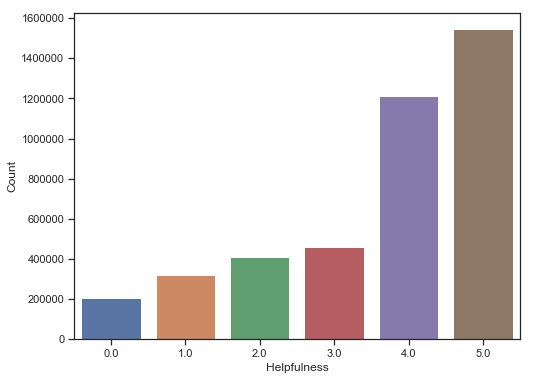

In [113]:
plt.figure(figsize=(8,6))
sns.barplot(x='Helpfulness', y='Count', data=hp);

We can tell helpfulness is left-skewed. Let's transform to uniform distribution using stratified sampling

In [114]:
hp

,Helpfulness,Count
0,5.0,1547969
1,4.0,1211207
2,3.0,461121
3,2.0,408161
4,1.0,318596
5,0.0,205886


In [115]:
# in each helpfulness class, randomly sample 206000 rows
hp0 = df[df['helpfulness']==0]
hp1 = df[df['helpfulness']==1].sample(n=206000, random_state=1108)
hp2 = df[df['helpfulness']==2].sample(n=206000, random_state=1108)
hp3 = df[df['helpfulness']==3].sample(n=206000, random_state=1108)
hp4 = df[df['helpfulness']==4].sample(n=206000, random_state=1108)
hp5 = df[df['helpfulness']==5].sample(n=206000, random_state=1108)

In [122]:
# concatenate dataframes
df = pd.concat([hp0, hp1, hp2, hp3, hp4, hp5], axis=0)

In [123]:
# sort rows by product id 
df = df.sort_values(by='asin')

In [124]:
# reset index
df = df.reset_index(drop=True)

In [125]:
df.head()

,reviewerID,asin,overall,reviewTime,categories,price,helpful_num,helpful_den,helpfulness,review
0,A12OFS8WQP86O5,0000031887,5.0,2011-02-08,Clothing,6.79,20,23,4.0,Better than i expected. I looked all over amaz...
1,A1M7MWBQJEJWLY,0000031887,5.0,2009-12-13,Clothing,6.79,9,12,4.0,Great Tutu for a Great Price. I'm really happy...
2,AQ2NZ5X891VX1,0000031887,5.0,2011-01-18,Clothing,6.79,14,14,5.0,Tutu Cute!. I ordered this tutu for my three y...
3,A30WLYNJA3B17H,0000589012,5.0,2008-10-23,Movies & TV,15.95,8,11,4.0,Human Connection and Compassion. There is a tu...
4,A39VF226GBM1JH,0000589012,1.0,2008-08-11,Movies & TV,15.95,8,19,2.0,"If you are a professional, don't bother!. I pu..."


In [126]:
hp = df['helpfulness'].value_counts().reset_index()
hp = hp.rename(columns={'index': 'Helpfulness', 'helpfulness': 'Count'})

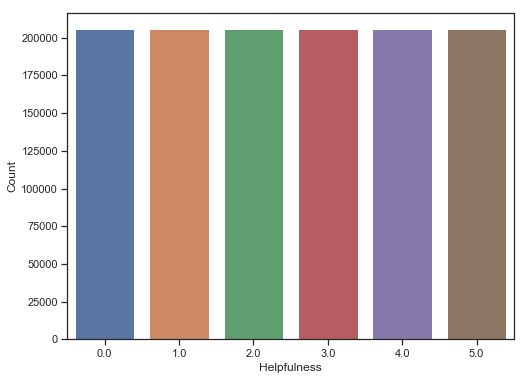

In [127]:
plt.figure(figsize=(8,6))
sns.barplot(x='Helpfulness', y='Count', data=hp);

In [128]:
df.shape

(1235886, 10)

Now, data is uniformly distributed when it comes to helpfulness rating, and our data size is reduced from 4.15M rows to about 1.24M rows

Need to think about what to do with categories... leave it there or cut off below 400

In [129]:
df.price.describe()

count    1.235886e+06
mean     4.004408e+01
std      8.798311e+01
min      0.000000e+00
25%      8.990000e+00
50%      1.388000e+01
75%      2.998000e+01
max      9.999900e+02
Name: price, dtype: float64

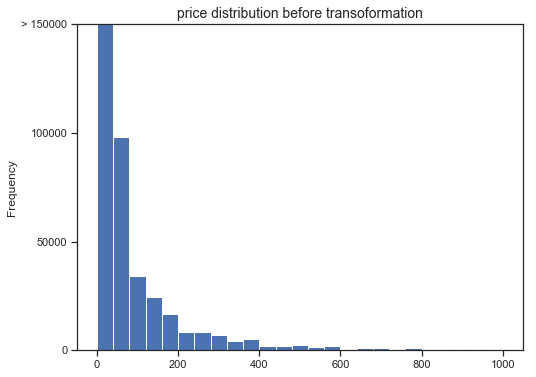

In [130]:
ax = df.price.plot(kind='hist', bins=25, figsize=(8, 6))
ax.set_title("price distribution before transoformation", fontsize=14)
ax.set_ylim((0, 150000))
ax.set_yticks([0, 50000, 100000, 150000])
ax.set_yticklabels([0, 50000, 100000, "> 150000"]);

We can tell price is highly right skewed. According to [wikipedia](https://en.wikipedia.org/wiki/Data_transformation_(statistics)), when there is evidence of substantial skew in the data, it is common to transform the data to a symmetric distribution. Using logarithmic transformations will help the data spread more evenly and the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of 0 is undefined, so we must translate the values by a small amount above 0 to apply the the logarithm successfully.

In [131]:
ser = df.price.copy()

In [132]:
ser = ser.apply(lambda x: np.log(x + 1))

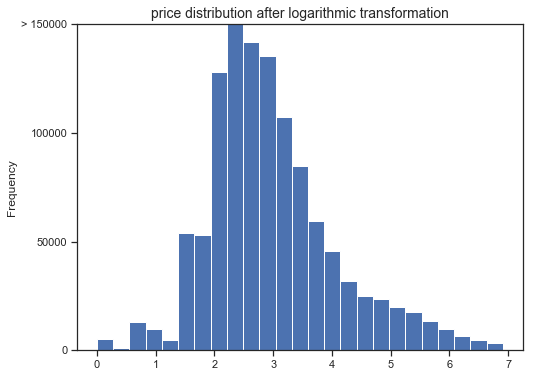

In [133]:
ax = ser.plot(kind='hist', bins=25, figsize=(8, 6))
ax.set_title("price distribution after logarithmic transformation", fontsize=14)
ax.set_ylim((0, 150000))
ax.set_yticks([0, 50000, 100000, 150000])
ax.set_yticklabels([0, 50000, 100000, "> 150000"]);

In [134]:
ser.describe()

count    1.235886e+06
mean     2.926955e+00
std      1.075341e+00
min      0.000000e+00
25%      2.301585e+00
50%      2.700018e+00
75%      3.433342e+00
max      6.908745e+00
Name: price, dtype: float64

In [135]:
df['price'] = ser

In [136]:
df.head()

,reviewerID,asin,overall,reviewTime,categories,price,helpful_num,helpful_den,helpfulness,review
0,A12OFS8WQP86O5,0000031887,5.0,2011-02-08,Clothing,2.052841,20,23,4.0,Better than i expected. I looked all over amaz...
1,A1M7MWBQJEJWLY,0000031887,5.0,2009-12-13,Clothing,2.052841,9,12,4.0,Great Tutu for a Great Price. I'm really happy...
2,AQ2NZ5X891VX1,0000031887,5.0,2011-01-18,Clothing,2.052841,14,14,5.0,Tutu Cute!. I ordered this tutu for my three y...
3,A30WLYNJA3B17H,0000589012,5.0,2008-10-23,Movies & TV,2.830268,8,11,4.0,Human Connection and Compassion. There is a tu...
4,A39VF226GBM1JH,0000589012,1.0,2008-08-11,Movies & TV,2.830268,8,19,2.0,"If you are a professional, don't bother!. I pu..."


In [137]:
df.to_csv('./h5_filtered/df_all_filtered_v6.csv.gz', encoding='utf-8', index=False, compression='gzip')

In [70]:
# # this may take approximately 10 minutes
# df = pd.read_csv('./h5_filtered/df_all_filtered_v6.csv.gz', compression='gzip', parse_dates=['reviewTime'], low_memory=False)

## Normalizing Numerical Features

In [138]:
ser = df[['price']].copy()

In [139]:
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display # Allows the use of display() for DataFrames

# scale to [0, 1]
scaler = MinMaxScaler()
ser = scaler.fit_transform(ser)

In [141]:
display(ser)

array([[0.29713659],
       [0.29713659],
       [0.29713659],
       ...,
       [0.09960342],
       [0.09960342],
       [0.09960342]])

In [142]:
df['price'] = ser

In [144]:
df.price.describe()

count    1.235886e+06
mean     4.236594e-01
std      1.556493e-01
min      0.000000e+00
25%      3.331408e-01
50%      3.908117e-01
75%      4.969560e-01
max      1.000000e+00
Name: price, dtype: float64

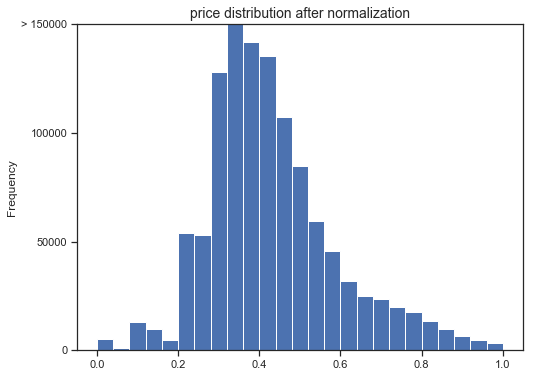

In [145]:
ax = df.price.plot(kind='hist', bins=25, figsize=(8, 6))
ax.set_title("price distribution after normalization", fontsize=14)
ax.set_ylim((0, 150000))
ax.set_yticks([0, 50000, 100000, 150000])
ax.set_yticklabels([0, 50000, 100000, "> 150000"]);

In [143]:
df.head()

,reviewerID,asin,overall,reviewTime,categories,price,helpful_num,helpful_den,helpfulness,review
0,A12OFS8WQP86O5,0000031887,5.0,2011-02-08,Clothing,0.297137,20,23,4.0,Better than i expected. I looked all over amaz...
1,A1M7MWBQJEJWLY,0000031887,5.0,2009-12-13,Clothing,0.297137,9,12,4.0,Great Tutu for a Great Price. I'm really happy...
2,AQ2NZ5X891VX1,0000031887,5.0,2011-01-18,Clothing,0.297137,14,14,5.0,Tutu Cute!. I ordered this tutu for my three y...
3,A30WLYNJA3B17H,0000589012,5.0,2008-10-23,Movies & TV,0.409665,8,11,4.0,Human Connection and Compassion. There is a tu...
4,A39VF226GBM1JH,0000589012,1.0,2008-08-11,Movies & TV,0.409665,8,19,2.0,"If you are a professional, don't bother!. I pu..."


In [146]:
df.to_csv('./h5_filtered/df_all_filtered_v7.csv.gz', encoding='utf-8', index=False, compression='gzip')

In [ ]:
# this may take approximately 10 minutes
df = pd.read_csv('./h5_filtered/df_all_filtered_v7.csv.gz', compression='gzip', parse_dates=['reviewTime'], low_memory=False)

## ***** discussion about category distribution

In [147]:
cat_ser = df.categories.value_counts()
cat_ser

Books                        559801
Movies & TV                  158357
CDs & Vinyl                  122688
Electronics                   94440
Video Games                   46438
Home & Kitchen                37279
Health & Personal Care        35844
Sports & Outdoors             22611
Tools & Home Improvement      18519
Toys & Games                  18353
Beauty                        15120
Cell Phones & Accessories     14120
Office Products               11787
Patio                          9762
Grocery & Gourmet Food         9423
Clothing                       8838
Software                       8536
Baby                           7591
Pet Supplies                   6602
Automotive                     6074
Musical Instruments            5010
Buy a Kindle                   4681
Arts                           3481
Industrial & Scientific        2259
Magazine Subscriptions         1142
Digital Music                  1136
Appliances                      916
Baby Products               

In [149]:
cat_ser[cat_ser > 400], cat_ser[cat_ser > 400].shape

(Books                        559801
 Movies & TV                  158357
 CDs & Vinyl                  122688
 Electronics                   94440
 Video Games                   46438
 Home & Kitchen                37279
 Health & Personal Care        35844
 Sports & Outdoors             22611
 Tools & Home Improvement      18519
 Toys & Games                  18353
 Beauty                        15120
 Cell Phones & Accessories     14120
 Office Products               11787
 Patio                          9762
 Grocery & Gourmet Food         9423
 Clothing                       8838
 Software                       8536
 Baby                           7591
 Pet Supplies                   6602
 Automotive                     6074
 Musical Instruments            5010
 Buy a Kindle                   4681
 Arts                           3481
 Industrial & Scientific        2259
 Magazine Subscriptions         1142
 Digital Music                  1136
 Appliances                      916
 